# Scedastic Surrogate Swarm Tests

In [1]:
from sssopy import SurrogateSearch, SSSoProblem, SurrogateSwarm, plot_optimizer_results_with_rec
import numpy as np

In [2]:
def model_function(params,args):
    input_vals, check = args
    modval = params[0] * np.cos(input_vals * params[1]) + params[1] * np.sin(input_vals * params[0])
    #modval = params[0] + input_vals**2 * params[1]**2
    global objective_function_calls
    objective_function_calls += 1
    return modval

def ineq_constraints(params):
    # ineq1 = (params[0]-params[1])
    # ineq2 = (params[0]-params[1])
    return [0]

def eq_constraints(params):
    # eq1 = (params[0]+params[1])-0.72
    return [0]


In [3]:
objective_function_calls = 0

check = 1
xdat = np.arange(1, 100.5, 0.5)
params = np.array([0.32, 0.4])
opt_problem = SSSoProblem(model_function = model_function,
                            ineq_constraints = ineq_constraints,
                            eq_constraints = eq_constraints,
                            args = (xdat,check)
                            )
ydat = opt_problem.eval_function(params)


## Surrogate Swarm Test

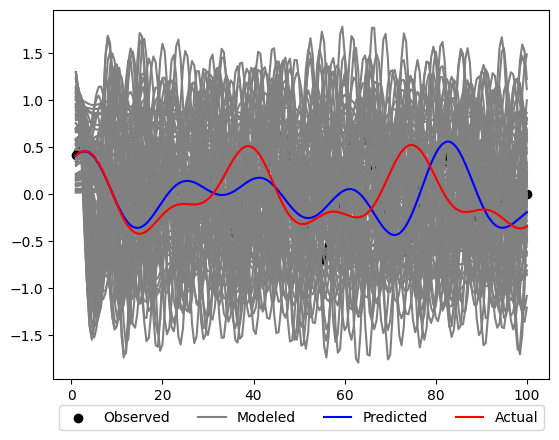

[0.35837192 0.1674881 ]
Objective Function Calls: 201


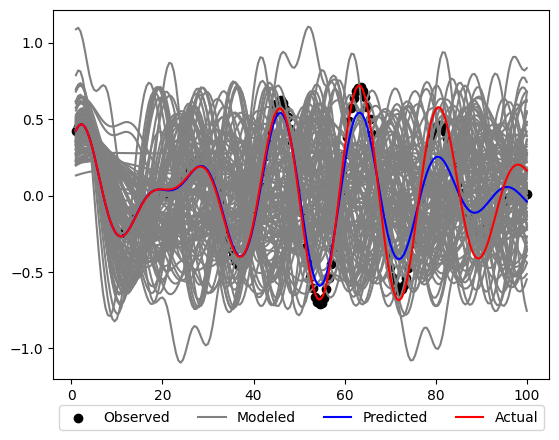

[0.32328415 0.39757026]
Objective Function Calls: 302


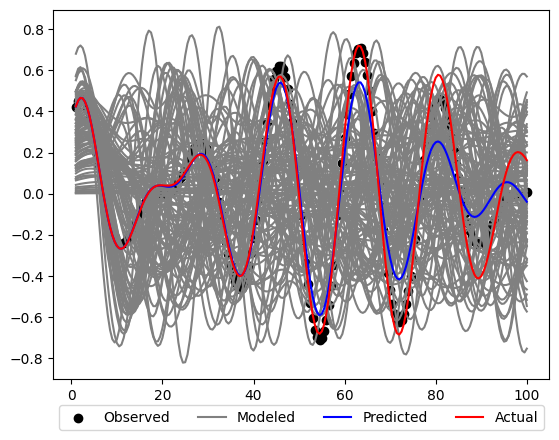

[0.32328415 0.39757027]
Objective Function Calls: 403


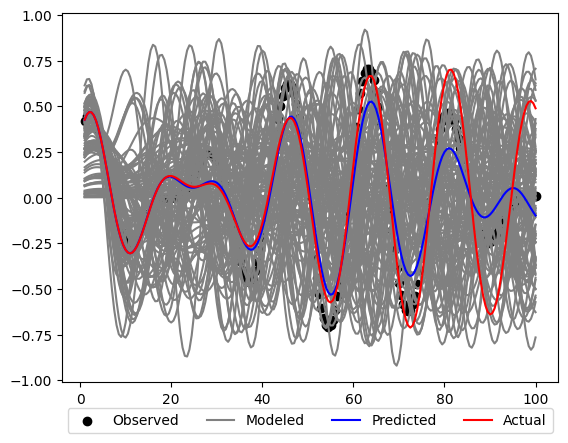

[0.32613536 0.3886958 ]
Objective Function Calls: 504


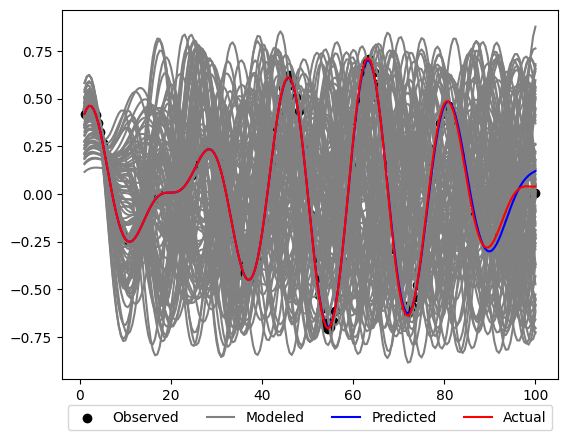

[0.32088287 0.39979571]
Objective Function Calls: 605


In [4]:
objective_function_calls = 0

swarmer = SurrogateSwarm(opt_problem,
                            ydat,
                            2,
                            [0,0],
                            [1,1])

for itt in range(5):
        swarmer.step_swarm()
        swarmer.swarm_state["surrogate_recommendations"]
        plot_optimizer_results_with_rec(swarmer.swarm_state["pos_x"],
                                        swarmer.swarm_state["pos_results"],
                                        xdat,
                                        ydat,
                                        swarmer.swarm_state["surrogatesaves"],
                                        swarmer.swarm_state["centersaves"],
                                        swarmer.swarm_state["surrogate_recommendations"],
                                        optproblem = opt_problem
                                        )
        # print(np.mean(swarmer.swarm_state["pos_x"],axis = 0))
        print(swarmer.swarm_state["surrogate_recommendations"])
        print(f"Objective Function Calls: {objective_function_calls}")

## Surrogate Search Test

c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in divide
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in log
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: invalid value encountered in add
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)


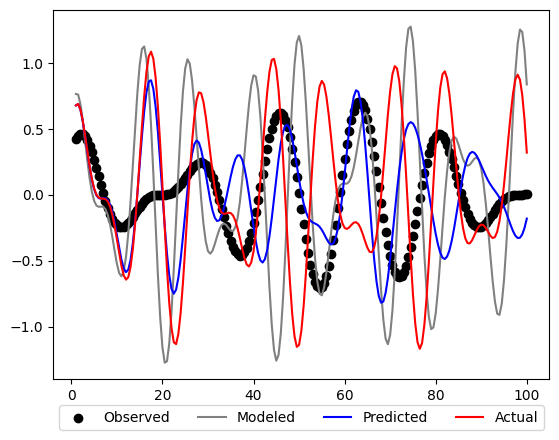

[[0.47173396 0.69834202]]
Objective Function Calls: 6


c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in divide
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in log
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: invalid value encountered in add
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)


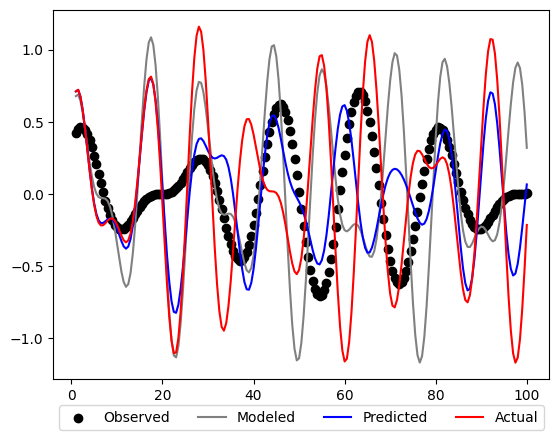

[[0.49822247 0.67696325]]
Objective Function Calls: 12
Generating new center


c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in divide
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: divide by zero encountered in log
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)
c:\users\johnm\documents\github\stochasticsurrogateswarmpy\sssopy\scedasticity.py:21: RuntimeWarning: invalid value encountered in add
  return 1/(2*std**2)*np.abs(desired_values-mean)**2+1/2*np.log(std**2)


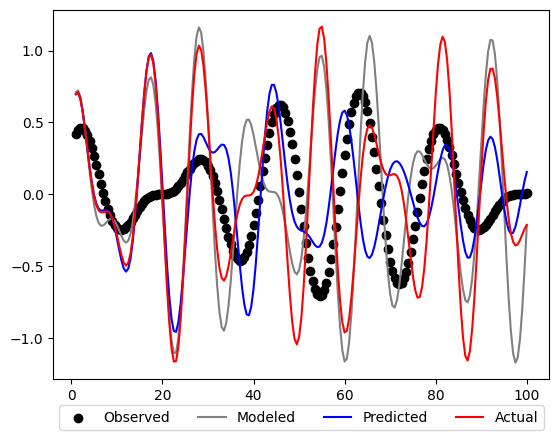

[[0.48593354 0.6888363 ]]
Objective Function Calls: 18
Generating new center


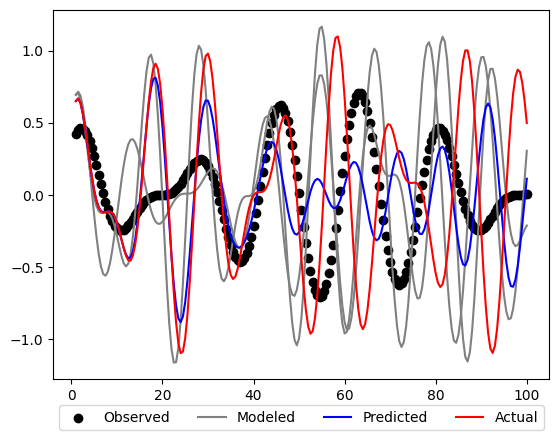

[[0.45745314 0.6470621 ]
 [0.44622242 0.59631204]]
Objective Function Calls: 29


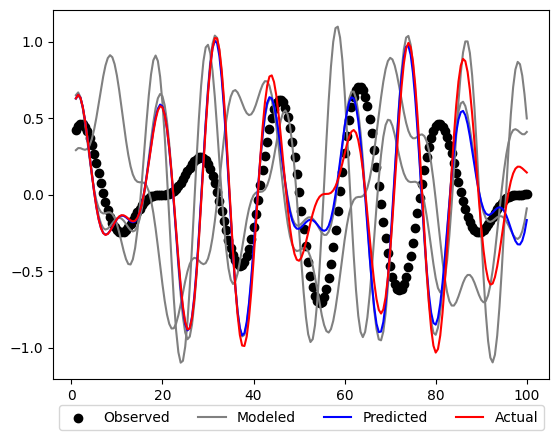

[[0.44965018 0.58996128]
 [0.43123214 0.66568317]
 [0.43123226 0.66568338]]
Objective Function Calls: 45
Generating new center


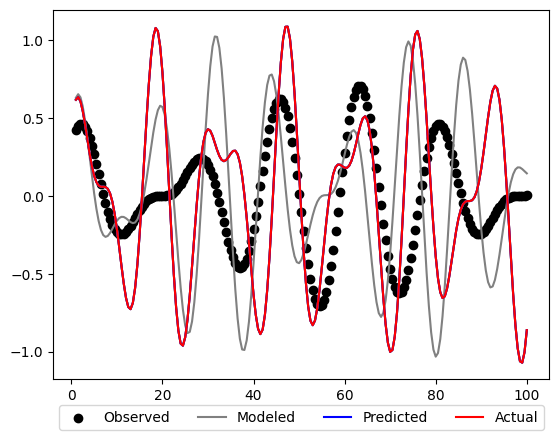

[[0.43123231 0.66568345]
 [0.41934383 0.72187   ]
 [0.42407365 0.62783112]]
Objective Function Calls: 61
Generating new center


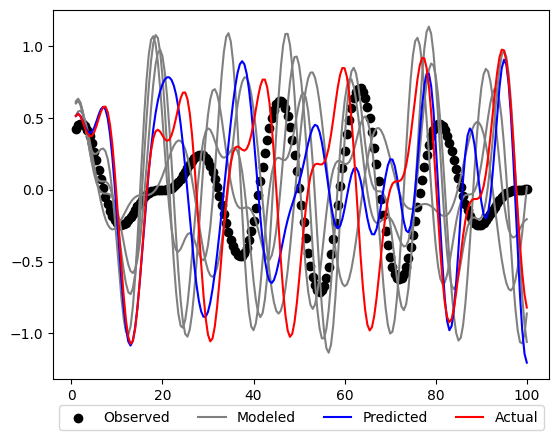

[[0.35280791 0.72530046]
 [0.44727142 0.71396384]
 [0.39526416 0.65288242]
 [0.32382328 0.43340323]]
Objective Function Calls: 82


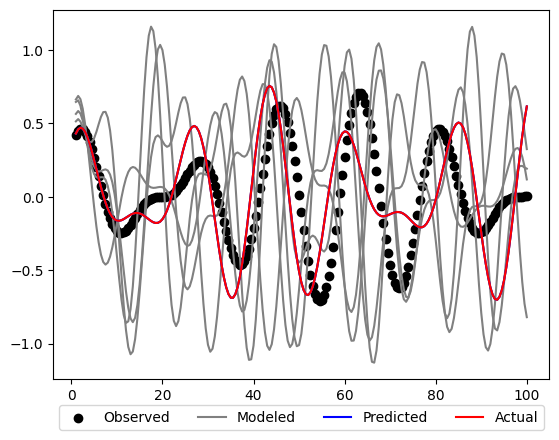

[[0.32382335 0.43340323]
 [0.32382332 0.43340322]
 [0.35415629 0.67743662]
 [0.2760694  0.40869469]
 [0.2760694  0.40869471]]
Objective Function Calls: 108
Generating new center


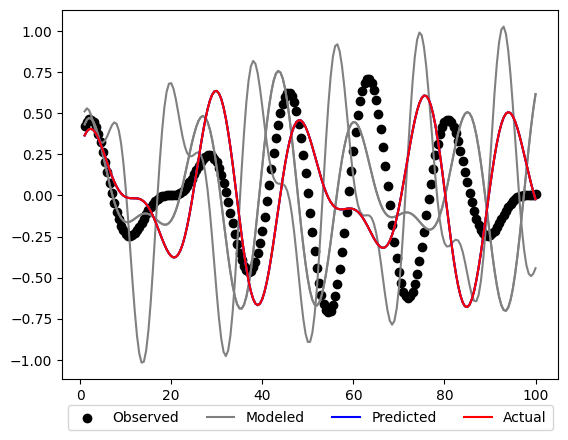

[[0.27606939 0.4086947 ]
 [0.27606941 0.4086947 ]
 [0.27606944 0.40869472]
 [0.28719473 0.44453074]
 [0.30068778 0.419616  ]]
Objective Function Calls: 134


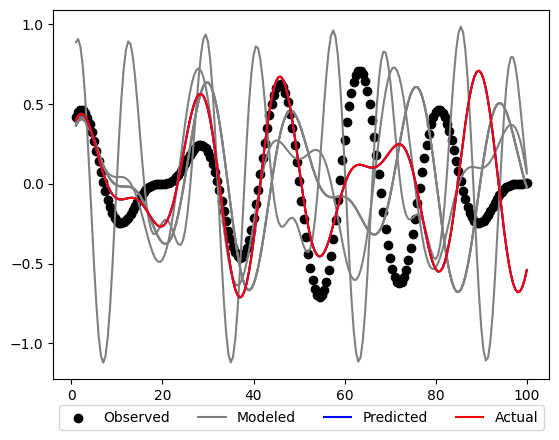

[[0.30068777 0.41961601]
 [0.30068779 0.41961598]
 [0.29787088 0.42506024]
 [0.30002151 0.42090373]
 [0.33347512 0.39970171]
 [0.33347514 0.39970163]]
Objective Function Calls: 165


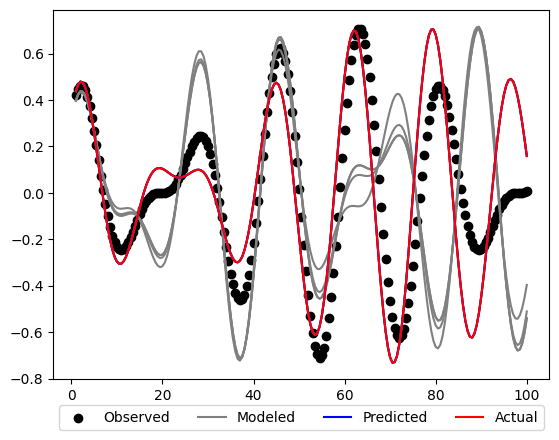

[[0.33347528 0.39970113]
 [0.32930837 0.39482087]
 [0.3293084  0.39482085]
 [0.32930839 0.39482085]
 [0.32055269 0.41423369]
 [0.31745695 0.38707556]]
Objective Function Calls: 196
Generating new center


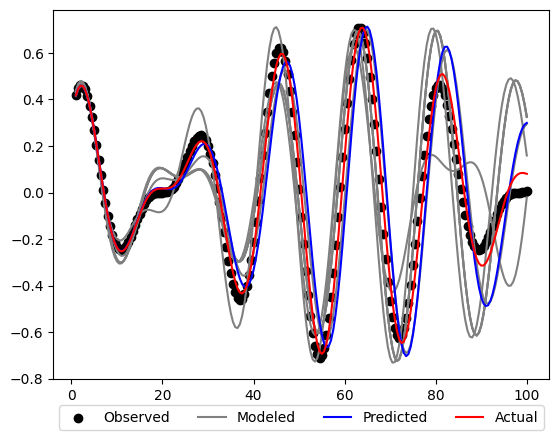

[[0.31848033 0.39540692]
 [0.31522259 0.38809062]
 [0.31522256 0.38809059]
 [0.31522257 0.3880906 ]
 [0.31522257 0.3880906 ]
 [0.32136288 0.39403877]]
Objective Function Calls: 227


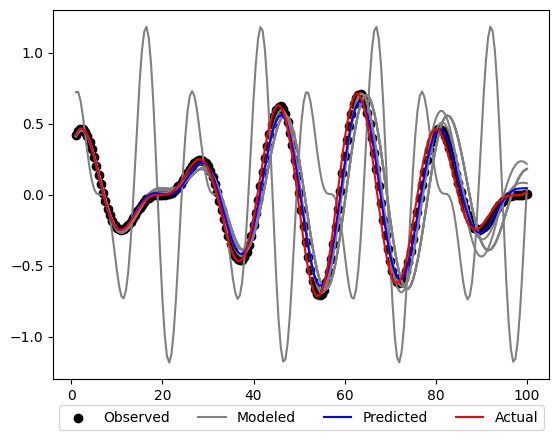

[[0.32264993 0.40345481]
 [0.32264993 0.40345482]
 [0.32264993 0.4034548 ]
 [0.32264993 0.40345481]
 [0.32264994 0.40345479]
 [0.32264993 0.4034548 ]
 [0.32264993 0.40345482]]
Objective Function Calls: 263


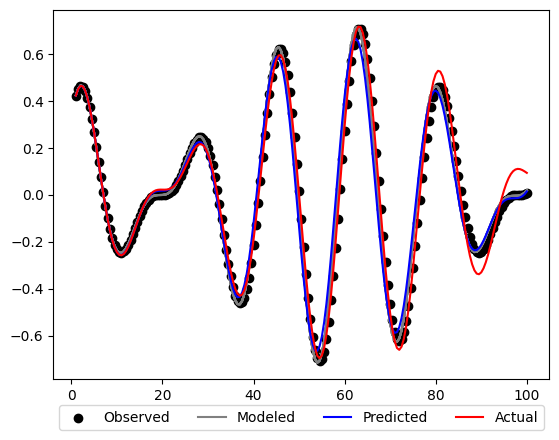

[[0.32184216 0.39876924]
 [0.32184216 0.39876924]
 [0.32184216 0.39876924]
 [0.32184216 0.39876924]
 [0.32184216 0.39876923]
 [0.32184216 0.39876923]
 [0.32184216 0.39876923]]
Objective Function Calls: 299
Generating new center


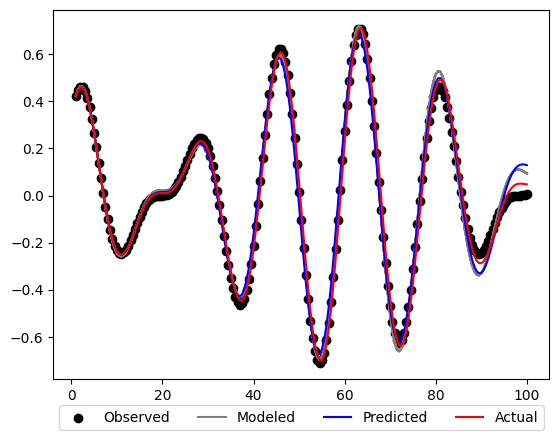

[[0.31949379 0.39775544]
 [0.31983358 0.40001591]
 [0.31983358 0.40001591]
 [0.31983358 0.40001591]
 [0.31983358 0.40001591]
 [0.31983358 0.40001591]
 [0.31983358 0.40001591]]
Objective Function Calls: 335


In [5]:
objective_function_calls = 0

searcher = SurrogateSearch(opt_problem,
                               ydat,
                               2,
                               [0,0],
                               [1,1])
    
for itt in range(15):
    searcher.step_search()
    plot_optimizer_results_with_rec(searcher.search_state["pos_x"],
                                    searcher.search_state["pos_results"],
                                    xdat,
                                    ydat,
                                    searcher.search_state["surrogatesaves"],
                                    searcher.search_state["centersaves"],
                                    searcher.search_state["surrogate_recommendations"][0],
                                    optproblem = opt_problem)
    #print(searcher.search_state["pos_x"])
    print(searcher.search_state["surrogate_recommendations"])
    print(f"Objective Function Calls: {objective_function_calls}")

## Search-Initialized Surrogate Swarm Test

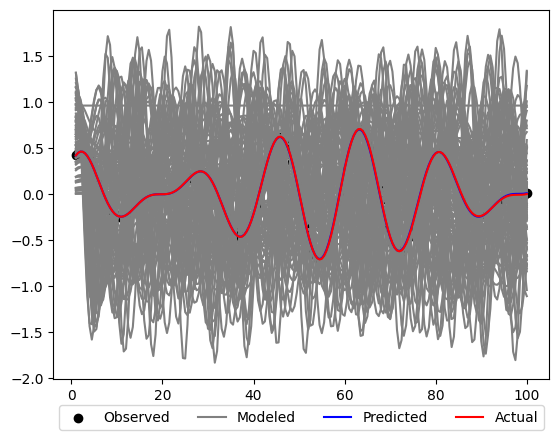

[0.31983358 0.40001591]
Objective Function Calls: 201
Fitting failed for rbf model: Singular matrix.


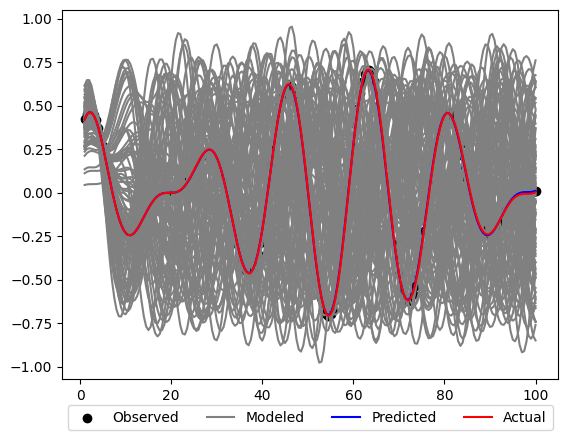

[0.31983358 0.40001591]
Objective Function Calls: 302


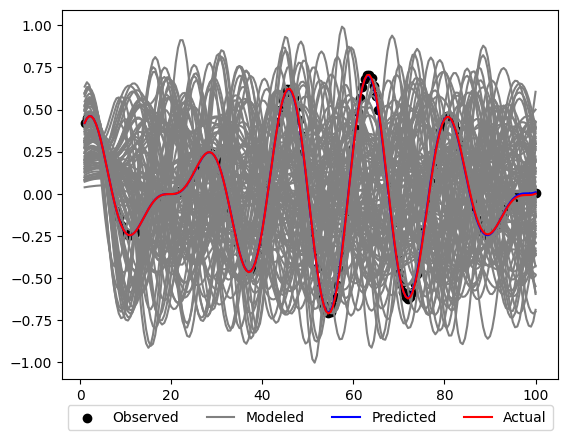

[0.31983358 0.40001591]
Objective Function Calls: 403


In [6]:
objective_function_calls = 0

searchswarmer = SurrogateSwarm(opt_problem,
                            ydat,
                            2,
                            [0,0],
                            [1,1],
                            surrogatesaves=searcher.search_state["surrogatesaves"],
                            centersaves=searcher.search_state["centersaves"],
                            all_pos=searcher.search_state["all_pos"],
                            all_results=searcher.search_state["all_results"])

for itt in range(3):
        searchswarmer.step_swarm()
        searchswarmer.swarm_state["surrogate_recommendations"]
        plot_optimizer_results_with_rec(searchswarmer.swarm_state["pos_x"],
                                        searchswarmer.swarm_state["pos_results"],
                                        xdat,
                                        ydat,
                                        searchswarmer.swarm_state["surrogatesaves"],
                                        searchswarmer.swarm_state["centersaves"],
                                        searchswarmer.swarm_state["surrogate_recommendations"],
                                        optproblem = opt_problem
                                        )
        # print(np.mean(searchswarmer.swarm_state["pos_x"],axis = 0))
        print(searchswarmer.swarm_state["surrogate_recommendations"])
        print(f"Objective Function Calls: {objective_function_calls}")